# –£—Ä–æ–∫ 4. –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from seaborn import heatmap, pairplot

from sklearn.preprocessing import MinMaxScaler

In [2]:
alpha = 0.8
# c_map = plt.get_cmap('Pastel1')
c_map = plt.get_cmap('tab10')

## –ó–∞–¥–∞—á–∞ 01

1. –°–∫–∞—á–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ —Å—Å—ã–ª–∫–µ https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv
1. –ò–∑—É—á–∏—Ç–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
1.  –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç—É—Ä—ã –∂–∏–ª–æ–π
1.  –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–¥–∞ –ø–æ—Å—Ç—Ä–æ–π–∫–∏

(–ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫, –Ω–∞–∑–≤–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –æ—Å–∏ x –∏ –æ—Å–∏ y, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã)

In [3]:
source = 'https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv'

df = pd.read_csv(source)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
params = {
    'color': c_map.colors[0],
    'edgecolor': 'black',
    'alpha': alpha
}

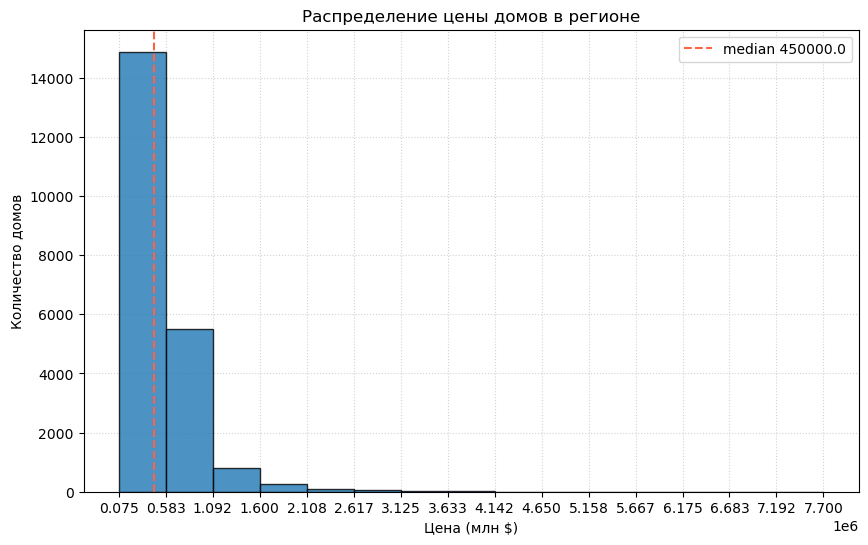

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'price'
md = df[target].median()

bins = ax.hist(df[target], **params, bins=15)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')

ax.set_xticks(bins[1])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã –¥–æ–º–æ–≤ –≤ —Ä–µ–≥–∏–æ–Ω–µ')
ax.set_xlabel('–¶–µ–Ω–∞ (–º–ª–Ω $)')
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

- –†—ã–Ω–æ–∫ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Ä–µ–≥–∏–æ–Ω–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω, –≤ –±–æ–ª—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –∂–∏–ª—å–µ–º —ç–∫–æ–Ω–æ–º-–∫–ª–∞—Å—Å–∞. 
- –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–µ–Ω—ã —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 450 —Ç—ã—Å –¥–æ–ª–ª–∞—Ä–æ–≤. 

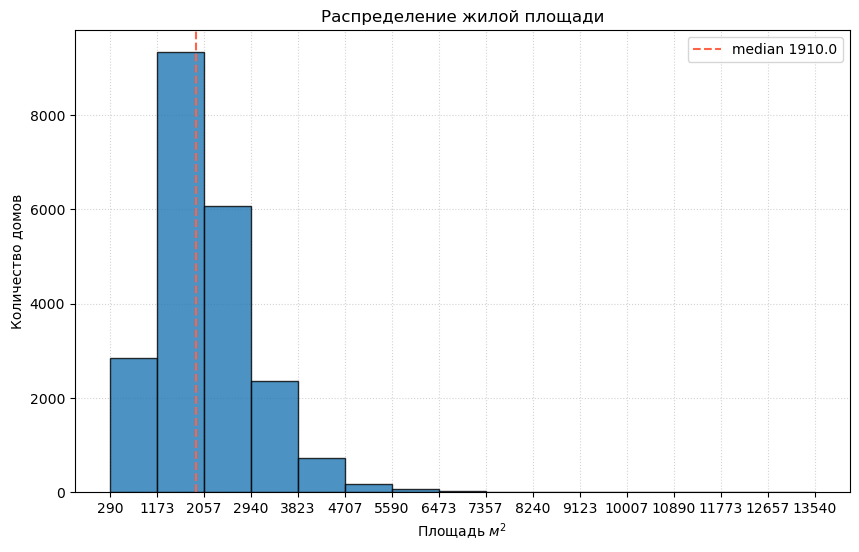

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'sqft_living'
md = df[target].median()

bins = ax.hist(df[target], **params, bins=15)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')

ax.set_xticks(bins[1])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏')
ax.set_xlabel('–ü–ª–æ—â–∞–¥—å $–º^2$')
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

- –ü–æ–ª–æ–≤–∏–Ω—É –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –¥–æ–º–∞ –æ—Ç 290 –¥–æ 1910 $–º^2$
- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞–∫ –∂–µ - —Å–∫–æ—à–µ–Ω–æ –≤–ª–µ–≤–æ. 

–ò–∑ —ç—Ç–∏—Ö –¥–≤—É—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ –∑–∞–∫–ª—é—á–∏—Ç—å, —á—Ç–æ —Ü–µ–Ω–∞ –¥–æ–º–∞ –ª–∏–Ω–µ–π–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –µ–≥–æ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ (–ø—Ä–æ–≤–µ—Ä–∏–º –ø–æ–∑–∂–µ)

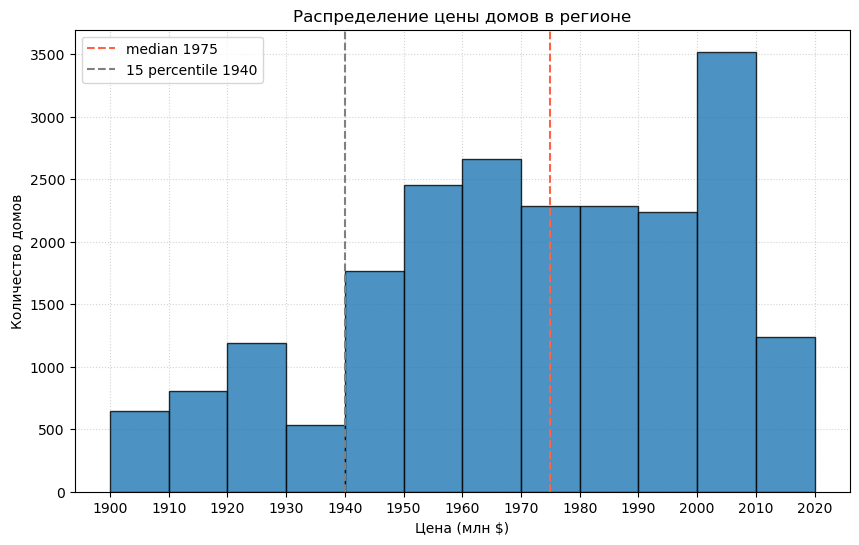

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'yr_built'
md = int(df[target].median())
pc15 = int(np.percentile(df[target], 15))
bins = range(1900, 2021, 10)

ax.hist(df[target].astype('int32'), **params, bins=bins)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')
ax.axvline(pc15, color='gray', ls='--', label=f'15 percentile {pc15}')

ax.set_xticks(bins)
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã –¥–æ–º–æ–≤ –≤ —Ä–µ–≥–∏–æ–Ω–µ')
ax.set_xlabel('–¶–µ–Ω–∞ (–º–ª–Ω $)')
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

- –ü–æ–ª–æ–≤–∏–Ω–∞ –¥–æ–º–æ–≤ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –≤ –ø–µ—Ä–∏–æ–¥ 1907 - 1975 –≥–æ–¥–æ–≤ (–Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 68 –ª–µ—Ç)
- –í—Ç–æ—Ä–∞—è –ø–æ–ª–æ–≤–∏–Ω–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –≤ –ø–µ—Ä–∏–æ–¥ 1976 - 2015 –≥–æ–¥–æ–≤ (–Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ 39 –ª–µ—Ç)

–ï—Å–ª–∏ —Ä–∞–∑–±–∏—Ç—å –≥–æ–¥ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–∞ –¥–æ–º–∞ –Ω–∞ 3 —Å–µ–≥–º–µ–Ω—Ç–∞ (–ø—Ä–∏–º–µ—Ä–Ω–æ –ø–æ 40 –ª–µ—Ç), —Ç–æ –ø–æ–ª—É—á–∏—Ç—Å—è, —á—Ç–æ –Ω–∞ –¥–æ–ª—é –ø–µ—Ä–≤–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ (–Ω–∞–∑–æ–≤–µ–º –µ–≥–æ "–¥–æ–≤–æ–µ–Ω–Ω—ã–º", —Ö–æ—Ç—è –≤ —Ç–µ—Ö –∫—Ä–∞—è—Ö –≤–æ–π–Ω—ã –Ω–µ –±—ã–ª–æ) –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è 15% –≤—Å–µ—Ö —Å—Ç—Ä–æ–µ–Ω–∏–π, –Ω–∞ –¥–æ–ª—é –≤—Ç–æ—Ä–æ–≥–æ (–Ω–∞–∑–æ–≤–µ–º –µ–≥–æ –ø–µ—Ä–∏–æ–¥–æ–º "–æ—Ç –≤–æ–π–Ω—ã –¥–æ –ø–æ—Ç–µ–ø–ª–µ–Ω–∏—è") –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è 25% –≤—Å–µ—Ö —Å—Ç—Ä–æ–µ–Ω–∏–π, –∏ –Ω–∞ –¥–æ–ª—é —Ç—Ä–µ—Ç—å–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ (–Ω–∞–∑–æ–≤–µ–º –µ–≥–æ "–Ω–æ–≤—ã–º") –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è 50% —Å—Ç—Ä–æ–µ–Ω–∏–π.

–ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ, —á–µ–º —Å—Ç–∞—Ä–µ–µ –¥–æ–º–∞, —Ç–µ–º –º–µ–Ω—å—à–µ –∏—Ö –æ—Å—Ç–∞–µ—Ç—Å—è, –ª–∏–±–æ, —á—Ç–æ –æ–Ω–∏ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –Ω–∞–¥–µ–∂–Ω—ã, —á—Ç–æ –∏–∑–±–∞–≤–ª—è—Ç—å—Å—è –æ—Ç –Ω–∏—Ö –Ω–µ —Ç–æ—Ä–æ–ø—è—Ç—Å—è, –ª–∏–±–æ, —á—Ç–æ —Ç–µ–º–ø—ã —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–∞ –≤ —Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –±—ã–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∏–∂–µ, —á–µ–º —Å–µ–π—á–∞—Å. 

–ê –≤–æ—Ç –¥–æ–º–∞ 2000 - 2010 –Ω–∞–æ–±–æ—Ä–æ—Ç, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ —Å–∞–º–æ–º –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ - –Ω–µ–≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω—ã–π –Ω–æ–≤–æ–≤—Å—Ç—Ä–æ–π.

–ù—É –∏ –¥–∞–≤–∞–π—Ç–µ, –≤—Å–µ –∂–µ –ø—Ä–æ–≤–µ—Ä–∏–º, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–æ–º–∞ —Å –º–µ–Ω—å—à–µ–π –ø–ª–æ—â–∞–¥—å—é —Å—Ç–æ—è—Ç –¥–µ—à–µ–≤–ª–µ?

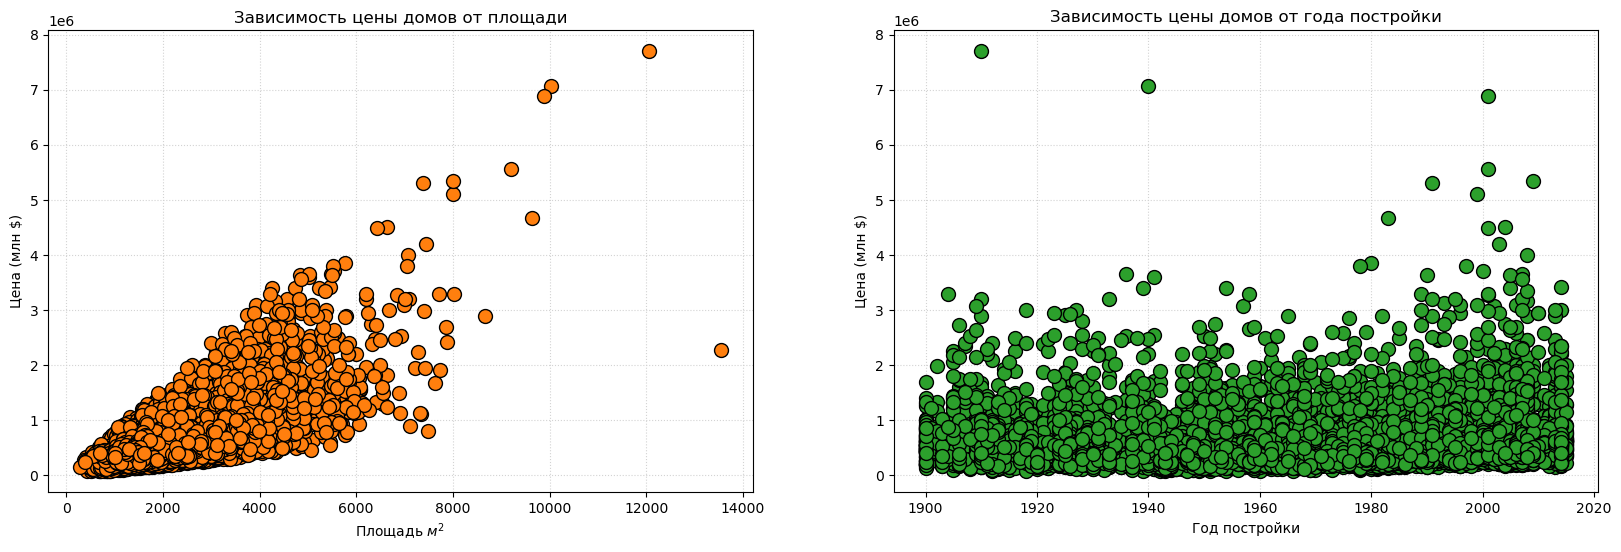

In [8]:
fig, axx = plt.subplots(1, 2, figsize=(20, 6))

ax = axx[0]
ax.scatter(df['sqft_living'], df['price'], s=100, color=c_map.colors[1], edgecolor='black')

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –¥–æ–º–æ–≤ –æ—Ç –ø–ª–æ—â–∞–¥–∏')
ax.set_ylabel('–¶–µ–Ω–∞ (–º–ª–Ω $)')
ax.set_xlabel('–ü–ª–æ—â–∞–¥—å $–º^2$');

ax = axx[1]
ax.scatter(df['yr_built'], df['price'], s=100, color=c_map.colors[2], edgecolor='black')

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –¥–æ–º–æ–≤ –æ—Ç –≥–æ–¥–∞ –ø–æ—Å—Ç—Ä–æ–π–∫–∏')
ax.set_ylabel('–¶–µ–Ω–∞ (–º–ª–Ω $)')
ax.set_xlabel('–ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏');

–î–∞, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –ø–ª–æ—â–∞–¥—å –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –¥–æ–º–∞. –ü—Ä–∏—á–µ–º, —á–µ–º –Ω–∏–∂–µ –ø–ª–æ—â–∞–¥—å, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ —ç—Ç–æ –≤–ª–∏—è–Ω–∏–µ. –ê –≤–æ—Ç –≥–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –Ω–∞ —Ü–µ–Ω—É –¥–æ–º–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∏–∫–∞–∫.

## –ó–∞–¥–∞—á–∞ 02

1. –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–º–æ–≤ –æ—Ç –Ω–∞–ª–∏—á–∏—è –≤–∏–¥–∞ –Ω–∞ –Ω–∞–±–µ—Ä–µ–∂–Ω—É—é
1. –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç—Ç–∞–∂–µ–π –¥–æ–º–æ–≤
2. –ò–∑—É—á–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ—Å—Ç–æ—è–Ω–∏—è –¥–æ–º–æ–≤

(–ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫, —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã)

In [9]:
params['color'] = c_map.colors

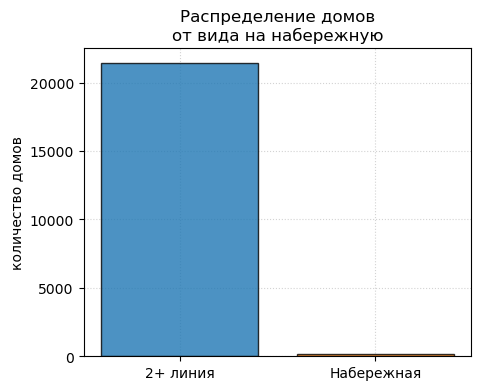

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))

tmp = df.groupby('waterfront', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['waterfront'], 
       tmp['qty'], 
       **params)

ax.set_xticks([0, 1])
ax.set_xticklabels(['2+ –ª–∏–Ω–∏—è', '–ù–∞–±–µ—Ä–µ–∂–Ω–∞—è'])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–º–æ–≤\n–æ—Ç –≤–∏–¥–∞ –Ω–∞ –Ω–∞–±–µ—Ä–µ–∂–Ω—É—é')
ax.set_ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –¥–æ–º–æ–≤ –Ω–∞ –Ω–∞–±–µ—Ä–µ–∂–Ω–æ–π –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ üôÇ

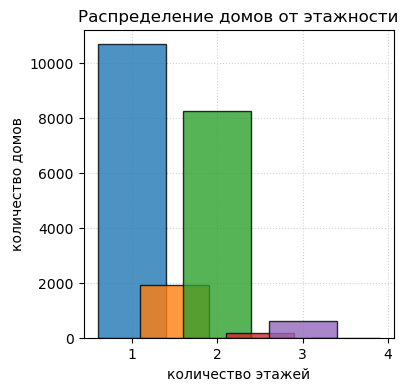

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

tmp = df.groupby('floors', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['floors'], 
       tmp['qty'], 
       **params)

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–º–æ–≤ –æ—Ç —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏')
ax.set_xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π')
ax.set_ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

–û—á–µ–Ω—å —Å—Ç—Ä–∞–Ω–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —ç—Ç–∞–∂–µ–π. –Ø –Ω–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç–æ—Ä, –Ω–æ - –≤–∏–¥–∏–º–æ —ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ.

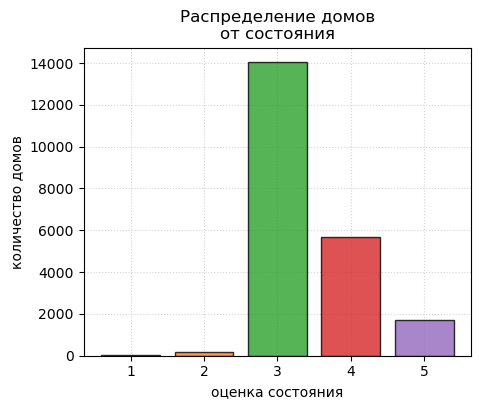

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

tmp = df.groupby('condition', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['condition'], 
       tmp['qty'], 
       **params)

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–º–æ–≤\n–æ—Ç —Å–æ—Å—Ç–æ—è–Ω–∏—è')
ax.set_xlabel('–æ—Ü–µ–Ω–∫–∞ —Å–æ—Å—Ç–æ—è–Ω–∏—è')
ax.set_ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–º–æ–≤');

–ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å? 

- "–£–±–∏—Ç—ã—Ö" –¥–æ–º–æ–≤ –Ω–∞ —Ä—ã–Ω–∫–µ –Ω–µ–º–Ω–æ–≥–æ
- –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–µ—Ç—Å—è "—Å–µ—Ä–µ–¥–Ω–µ—á–∫–æ–≤"

–û–±—â–µ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –¥–æ–º–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç ~60/40 ("—Å–µ—Ä–µ–¥–Ω–µ—á–∫–æ–≤"/"—É—Ö–æ–∂–µ–Ω–Ω—ã—Ö")

## –ó–∞–¥–∞—á–∞ 03

–ò—Å—Å–ª–µ–¥—É–π—Ç–µ, –∫–∞–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –Ω–µ –º–µ–Ω–µ–µ 5 –¥–∏–∞–≥—Ä–∞–º–º –∏–∑ —É—Ä–æ–∫–∞.

–ê–Ω–∞–ª–∏–∑ —Å–¥–µ–ª–∞–π—Ç–µ –≤ —Ñ–æ—Ä–º–∞—Ç–µ storytelling: –¥–æ–ø–æ–ª–Ω–∏—Ç—å –∫–∞–∂–¥—ã–π –≥—Ä–∞—Ñ–∏–∫ –ø–∏—Å—å–º–µ–Ω–Ω—ã–º–∏ –≤—ã–≤–æ–¥–∞–º–∏ –∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º–∏.

–ù–∞—á–Ω–µ–º —Ç–æ–≥–¥–∞ —Å –æ—á–∏—Å—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- –í—Ä—è–¥ –ª–∏ ID –∑–∞–ø–∏—Å–∏ –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –¥–æ–º–∞, –∫–∞–∫, —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ, –∏ –¥–∞—Ç–∞ –µ–≥–æ –ø—Ä–æ–¥–∞–∂–∏.
- –ú–æ–∂–Ω–æ —É–±—Ä–∞—Ç—å —à–∏—Ä–æ—Ç—É –∏ –¥–æ–ª–≥–æ—Ç—É (—É –º–µ–Ω—è –Ω–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã –≥–µ–æ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏, –∏ —è –Ω–µ –æ—á–µ–Ω—å —Ö–æ—á—É —Å—Ç–∞–≤–∏—Ç—å —ç—Ç–æ—Ç –±–∞–ª–ª–∞—Å—Ç)
- –¢–∞–∫ –∂–µ –º–Ω–µ —á—Ç–æ-—Ç–æ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–æ—Å–µ–¥–Ω–∏—Ö –¥–æ–º–æ–≤ —Ç–æ–∂–µ –Ω–µ —Å–ª–∏—à–∫–æ–º –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É (–∫–∞–∫ –∏ zipcode)

–ù—É –∞ —Ç–∞–∫ –∫–∞–∫ –Ω–∞—à–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ (—ç—Ç–æ –º—ã –≤–∏–¥–µ–ª–∏ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ —Ü–µ–Ω, –∫–≤–∞–¥—Ä–∞—Ç—É—Ä –∏ –≥–æ–¥–æ–≤ –ø–æ—Å—Ç—Ä–æ–π–∫–∏), –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –°–ø–∏—Ä–º–µ–Ω–∞. 

–î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –±—É–¥–µ–º –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—Ç—å—Å—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã:

|–ó–Ω–∞—á–µ–Ω–∏–µ|–≠—Ñ—Ñ–µ–∫—Ç|
|--------|------|
|0.0 - 0.3 |–æ—á. —Å–ª–∞–±–∞—è|
|0.3 - 0.5 |—Å–ª–∞–±–∞—è|
|0.5 - 0.7|—Å—Ä–µ–¥–Ω—è—è|
|0.7 - 0.9|–≤—ã—Å–æ–∫–∞—è|
|0.9 - 1.0|–æ—á. –≤—ã—Å–æ–∫–∞—è|

In [13]:
drop_columns = ['id', 'date', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode']

df.drop(drop_columns, axis=1, inplace=True)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  
0          1955             0  
1          1951          1991  
2          1933             0  
3          1965             0  
4          1987             0  
...         ...           ...  
21608      2009             0  
21609      2014             0  
21610      2009             0  
21611      2004             0  
21612      2008             0  

[21613 rows x 14 columns]

–ù–æ, –¥–ª—è –Ω–∞—á–∞–ª–∞, —Ç.–∫. –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏–º–µ–µ—Ç –ª–∏–Ω–µ–π–Ω—É—é –ø—Ä–∏—Ä–æ–¥—É , –ø—Ä–æ–≤–µ—Ä–∏–º—Å—è –Ω–∞ –≤—ã–±—Ä–æ—Å—ã:

<AxesSubplot: >

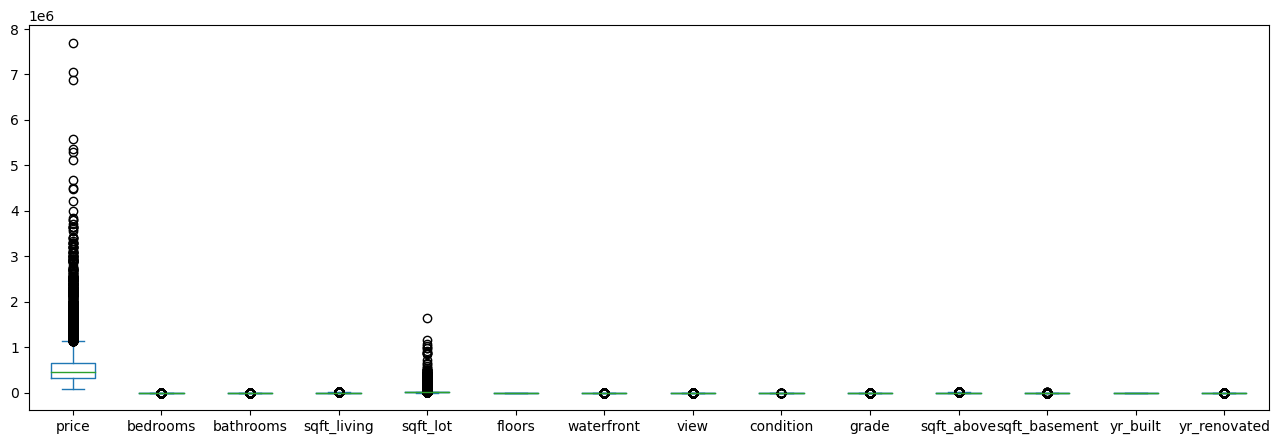

In [14]:
fig, ax = plt.subplots(figsize=(16,5))
df.plot(kind='box', ax=ax)

–ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –Ω–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞, –Ω–æ –ø–æ–ø—Ä–æ–±—É–µ–º –µ–π –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è, —á—Ç–æ–±—ã —Ä–∞–∑–≥–ª—è–¥–µ—Ç—å, —á—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —É –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ —Ä–∞–∑–Ω—ã–µ. –û—á–µ–Ω—å –ø–ª–æ—Ö–∞—è –±—ã–ª–∞ –∏–¥–µ—è.

In [15]:
mms = MinMaxScaler()
df_scale = mms.fit_transform(df)
df_scale = pd.DataFrame(data=df_scale, columns=mms.feature_names_in_)

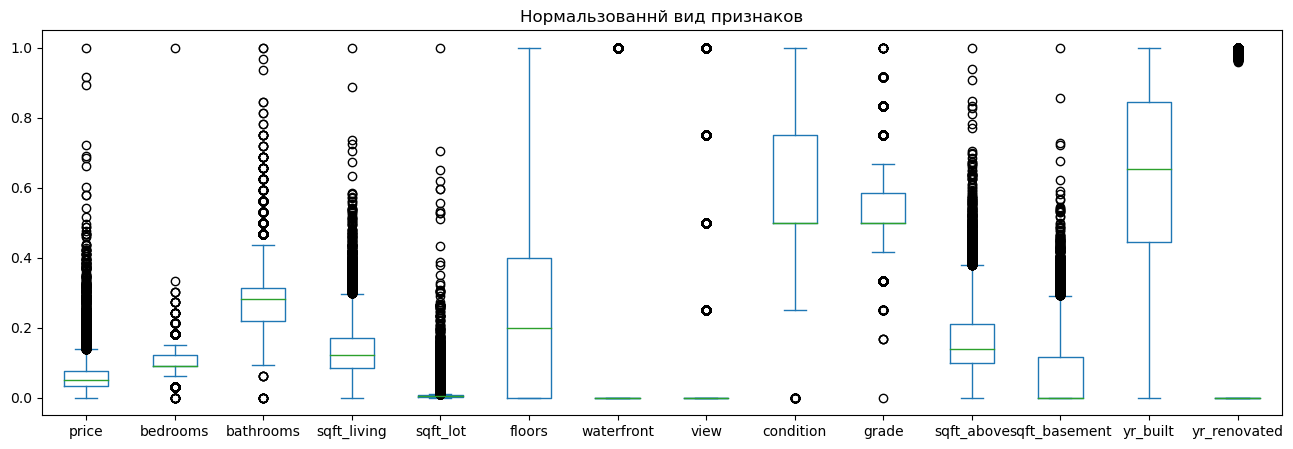

In [16]:
fig, ax = plt.subplots(figsize=(16,5))
df_scale.plot(kind='box', ax=ax)

ax.set_title('–ù–æ—Ä–º–∞–ª—å–∑–æ–≤–∞–Ω–Ω–π –≤–∏–¥ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤');

–¢–∞–∫ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –±—É–¥–µ—Ç –ø–æ–Ω–∞–≥–ª—è–¥–Ω–µ–µ. 

–í–∏–¥–∏–º, —á—Ç–æ –µ—Å—Ç—å –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ price, sqft_living, sqft_lot, sqft_above –∏ sqft_basement.

–ü—Ä–∏—á–µ–º, –¥–æ–≤–æ–ª—å–Ω–æ –ª–æ–≥–∏—á–Ω–æ, —á—Ç–æ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —É –ø–æ–¥–≤–∞–ª–∞ (—Ç–∞–º –º–µ–¥–∏–∞–Ω–∞ –Ω–∞ –Ω—É–ª–µ –ª–µ–∂–∏—Ç), –Ω–æ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø—Ä–µ–¥–ª–∞–≥–∞—é "–ø–æ–¥—Ä–µ–∑–∞—Ç—å" –Ω–∞ 1%

In [17]:
fields = ['price', 'sqft_living', 'sqft_lot', 'sqft_above']
borders = []

for i in fields:
    borders.append(df[i].quantile(0.99))

print('–ë—ã–ª–æ:\t', df.shape[0])
    
for i, k in zip(fields, borders):
    df = df[df[i] < k].copy()
    
print('–°—Ç–∞–ª–æ:\t',df.shape[0])

–ë—ã–ª–æ:	 21613
–°—Ç–∞–ª–æ:	 20989


–ü–æ—Ç–µ—Ä—è–Ω–æ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –≤—ã–±—Ä–æ—Å–æ–≤ —Å—Ç–∞–ª–æ –º–µ–Ω—å—à–µ. –ú–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é:

In [18]:
df.corr(method='spearman').iloc[0, :]

price            1.000000
bedrooms         0.324807
bathrooms        0.469436
sqft_living      0.621433
sqft_lot         0.030696
floors           0.306224
waterfront       0.085594
view             0.267323
condition        0.024243
grade            0.636504
sqft_above       0.513010
sqft_basement    0.243008
yr_built         0.085155
yr_renovated     0.099320
Name: price, dtype: float64

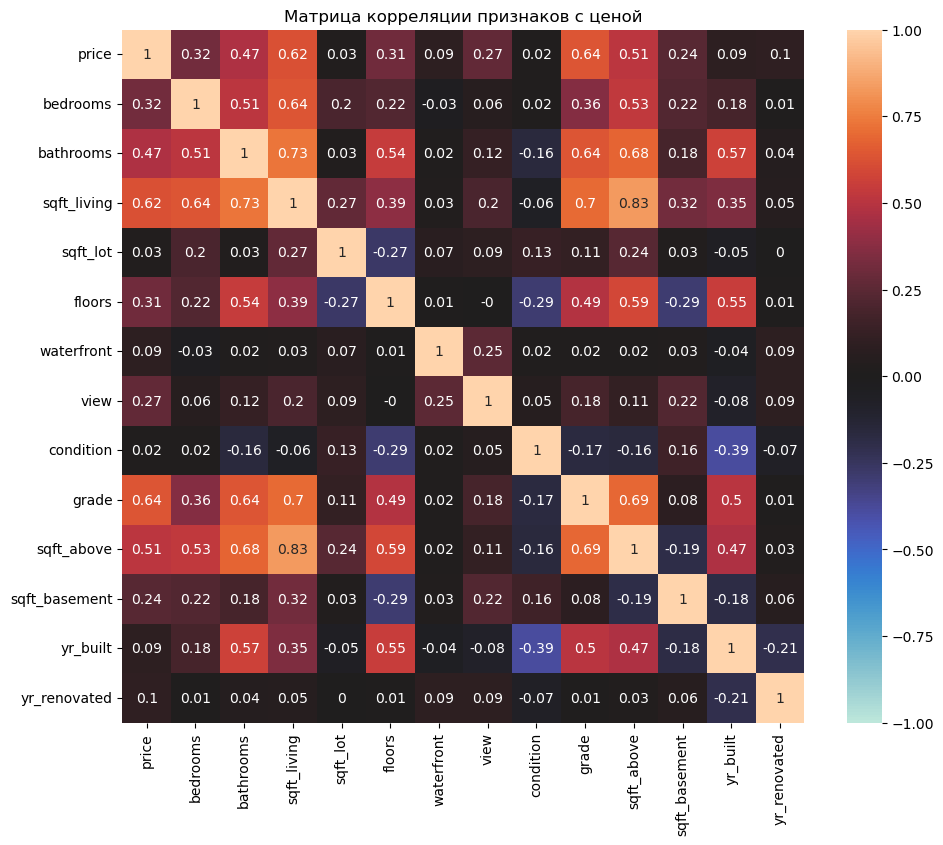

In [19]:
fig, ax = plt.subplots(figsize=(11, 9))

heatmap(np.around(df.corr(method='spearman'), 2), vmax=1, vmin=-1, center=0, annot=True)

ax.set_title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–Ω–æ–π');

–ï—Å–ª–∏ –æ—Ç–±—Ä–æ—Å–∏—Ç—å –æ—á–µ–Ω—å —Å–ª–∞–±—ã–µ —Å–∏–≥–Ω–∞–ª—ã, —Ç–æ –≤–∏–ª–¥–∏–º, —á—Ç–æ:
1. –°–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –µ—Å—Ç—å –ø–æ bedrooms, bathrooms, floors
1. –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–∏–¥–∏–º –ø–æ sqft_living, grade –∏ sqft_above

–ù–µ —Ç–∞–∫ –º–∞–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤?

–£–±–µ—Ä–µ–º –¥—Ä—É–≥–∏–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º

In [20]:
columns = ['price', 'floors', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_living', 'grade']

df = df[columns].copy()

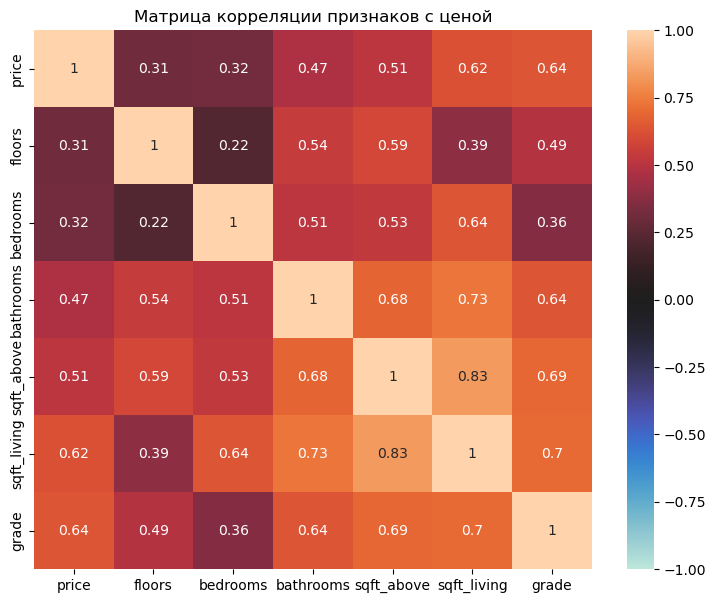

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))

heatmap(np.around(df.corr(method='spearman'), 2), vmax=1, vmin=-1, center=0, annot=True)

ax.set_title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–Ω–æ–π');

–ê –≤–∏–¥–∏–º –º—ã —Ç—É—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–∏–ª—å–Ω—É—é –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å, –∞ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –≤—Å–µ —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–ø—Ä—è–º—É—é –≤–ª–∏—è—é—Ç –Ω–µ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ü–µ–Ω—É, –Ω–æ –∏ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞.

–û—Ç—Å—Ç—Ä–æ–∏–º —ç—Ç–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏:

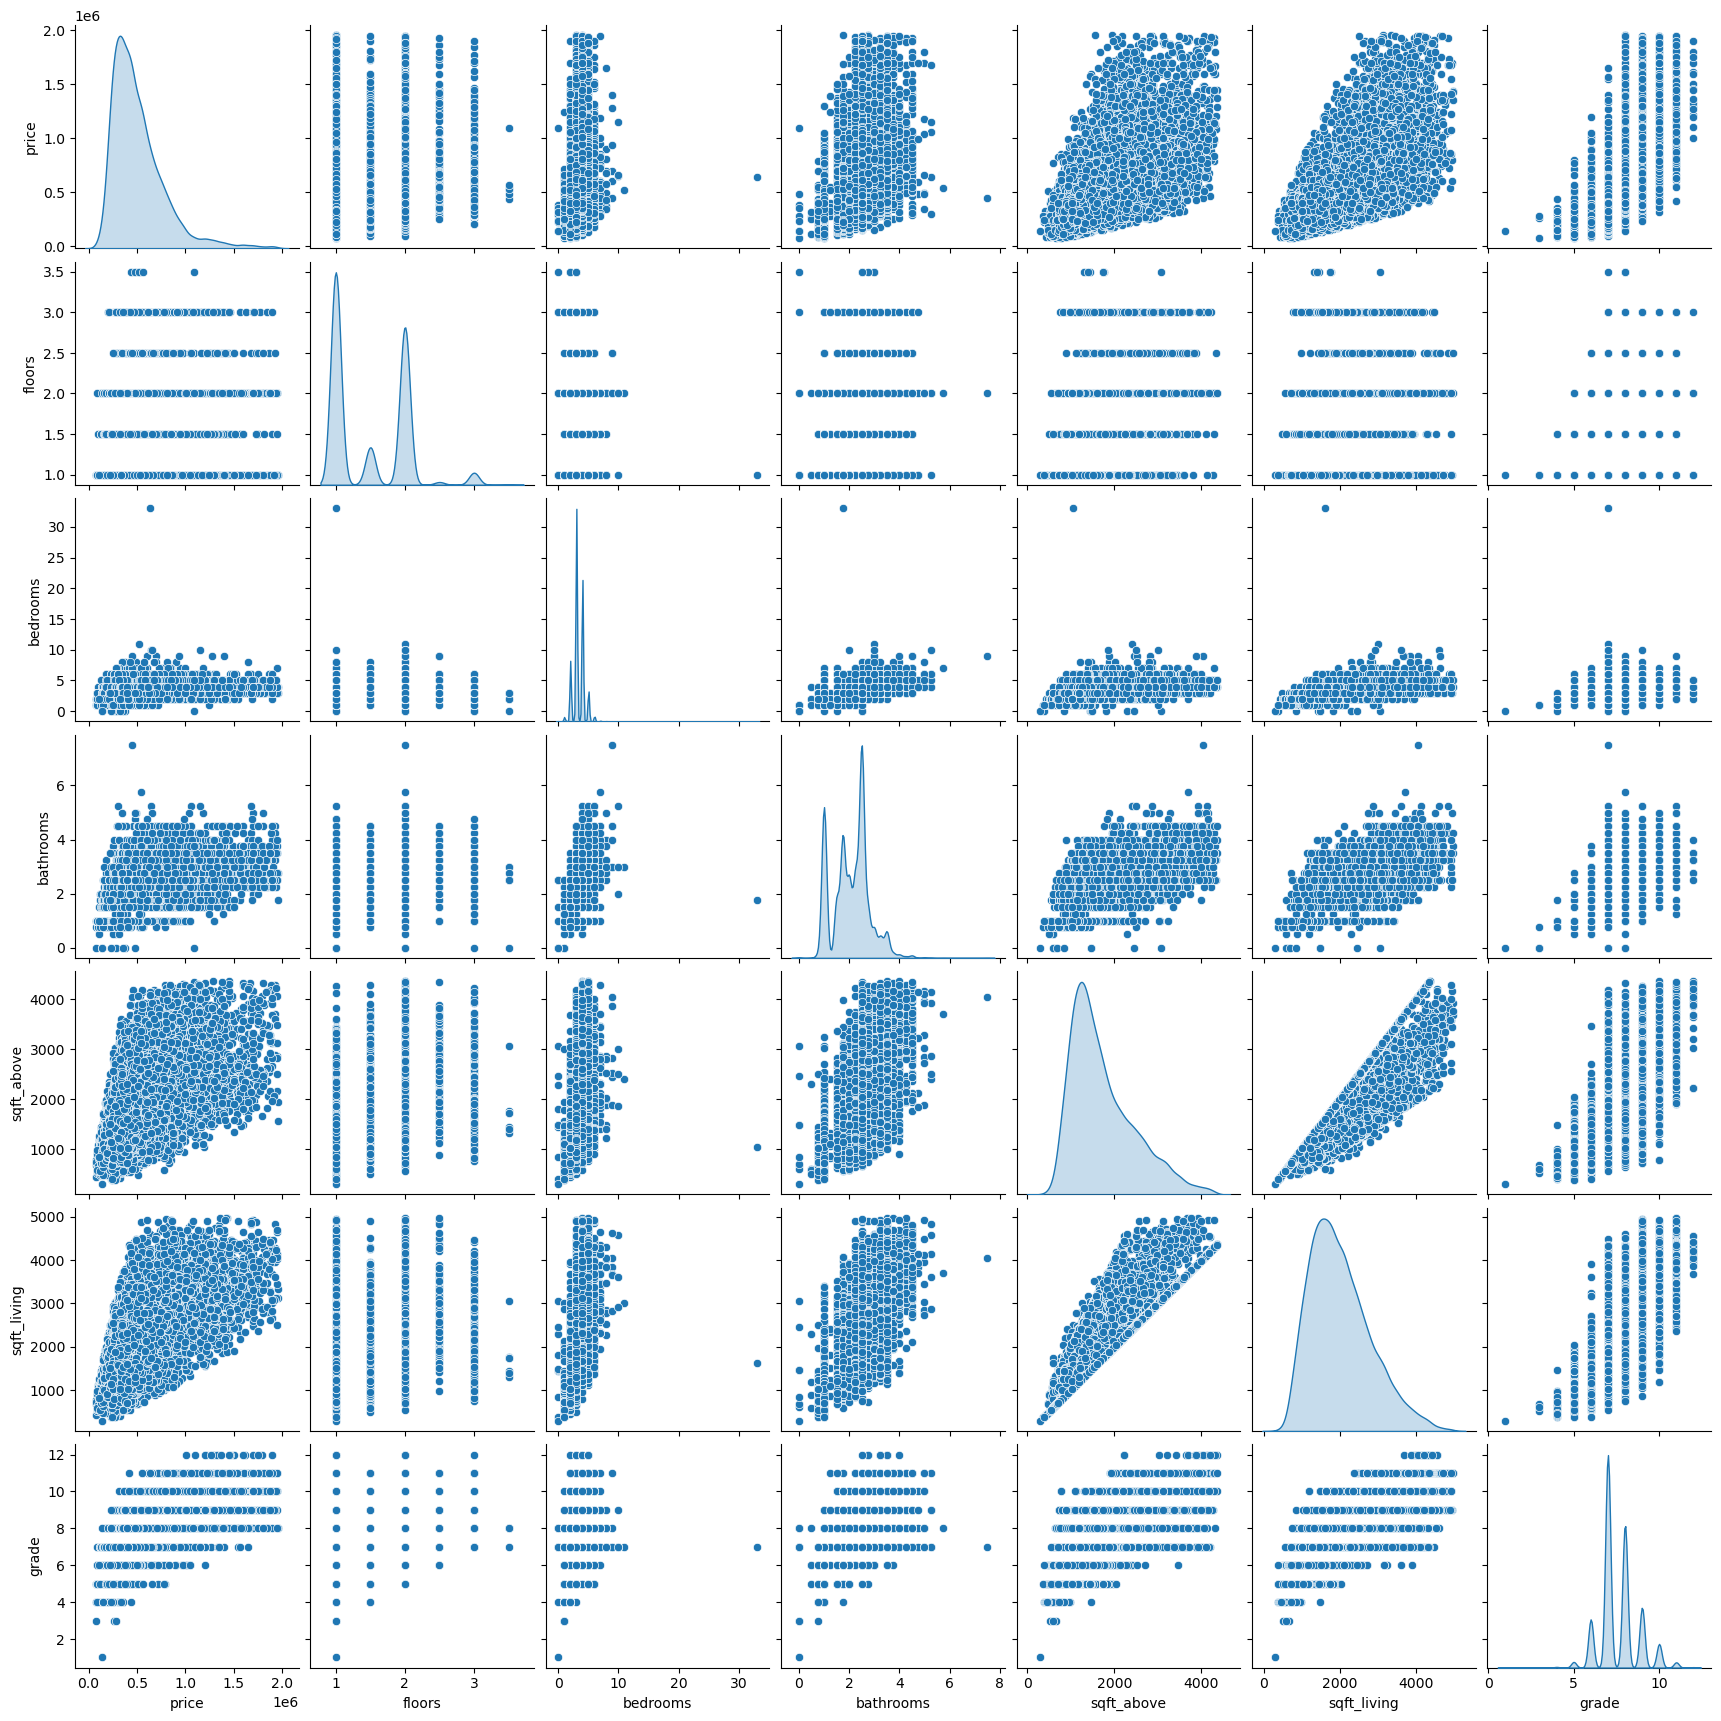

In [22]:
pairplot(df, diag_kind="kde")

–î–∞, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, 3 —Å–ª–∞–±—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è (floors, bedrooms –∏ bathroom) –º–∞–ª–æ –ø–æ—Ö–æ–¥—è—Ç –Ω–∞ –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. 

–û—Å—Ç–∞–ª—å–Ω–≤–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –∫–∞–∫—É-–Ω–∏–∫–∞–∫—É—é, –Ω–æ - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–µ–ª–∞—é **–≤—ã–≤–æ–¥**, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –¥–æ–º–∞, —è–≤–ª—è—é—Ç—Å—è sqft_above, sqft_living –∏ grade.